# DATEN VERBINDEN (SET OPERATIONS)

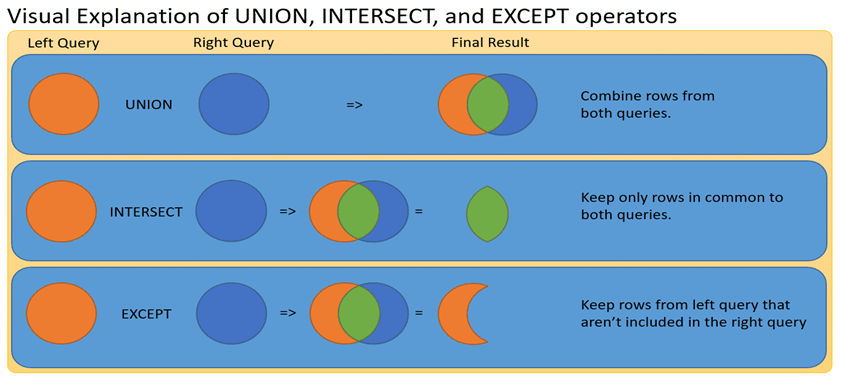  

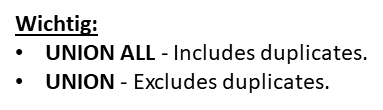

In [ ]:
-- Vorbereitung
USE MASTER
GO
DROP DATABASE IF EXISTS [TEST_SET_OPERATIONS]
GO
CREATE DATABASE [TEST_SET_OPERATIONS]
GO
USE [TEST_SET_OPERATIONS]
GO
Create TAble tbl1
( ID int null, name varchar(10) null)
GO
Create TAble tbl2
( ID int null, name varchar(10) null)
GO
Insert into tbl1( ID, Name)
Select 1, 'test1'
union
Select 2, 'test2'
union
Select 3, NULL
union
Select 4, 'test3'
GO
Insert into tbl2( ID, Name)
Select 1, 'test1'
union
Select 2, 'test2'
union
Select 3, NULL
GO

In [2]:
Select * from tbl1
Select * from tbl2

(4 rows affected)

(3 rows affected)

Total execution time: 00:00:00.030

ID,name
1,test1
2,test2
3,NULL
4,test3


ID,name
1,test1
2,test2
3,NULL


3 Datensätze sind in Tabelle 1 und Tabelle 2 identisch

# UNION & UNION ALL

## UNION - entfernt doppelte Einträge

In [3]:
Select * from tbl1
UNION
Select * from tbl2

(4 rows affected)

Total execution time: 00:00:00.020

ID,name
1,test1
2,test2
3,NULL
4,test3


Das kann man auch mittels FULL OUTER JOIN abbilden, wenngleich auch wesentlich aufwändiger

In [ ]:
Select isnull(t1.id,t2.id) as [ID], isnull(t1.name,t2.name) as [Name] from dbo.tbl1  as t1
full outer join dbo.tbl2 as t2
on isnull(t1.name,'leer') = isnull(t2.name,'leer')

## UNION ALL - doppelte Einträge bleiben erhalten

In [5]:
Select * from tbl1
UNION ALL
Select * from tbl2

(7 rows affected)

Total execution time: 00:00:00.016

ID,name
1,test1
2,test2
3,NULL
4,test3
1,test1
2,test2
3,NULL


In [ ]:
-- mit selben Ergebnis wie Union: - dh. doppelte Einträge entfernt
Select Distinct * from (
Select * from tbl1
UNION ALL
Select * from tbl2) as q

# EXCEPT

In [7]:
Select * from tbl1
EXCEPT
Select * from tbl2

(1 row affected)

Total execution time: 00:00:00.019

ID,name
4,test3


In [8]:
Select t1.ID, t1.Name from tbl1 as t1
left outer join tbl2 as t2
on isnull(t1.name,'leer') = isnull(t2.name,'leer')
where t2.id is null

(1 row affected)

Total execution time: 00:00:00.011

ID,Name
4,test3


# INTERSECT

In [9]:
Select * from tbl1
INTERSECT
Select * from tbl2

(3 rows affected)

Total execution time: 00:00:00.013

ID,name
1,test1
2,test2
3,NULL


In [10]:
Select isnull(t1.id,t2.id) as [ID], isnull(t1.name,t2.name) as [Name] from dbo.tbl1  as t1
inner join dbo.tbl2 as t2
on isnull(t1.name,'leer') = isnull(t2.name,'leer')

(3 rows affected)

Total execution time: 00:00:00.012

ID,Name
1,test1
2,test2
3,NULL


In [ ]:
-- Wichtig: NULL <> NULL beim ON eines Joins
Select isnull(t1.id,t2.id) as [ID], isnull(t1.name,t2.name) as [Name] from dbo.tbl1  as t1
inner join dbo.tbl2 as t2
on t1.name = t2.name